In [13]:
import xarray as xr
from os.path import join
import pylab as plt


In [27]:
base_dir = '/data/sent2/out'

resa = 'S2A_MSIL1C_20200106T114451_N0208_R123_T29UPV_20200106T120826_resampled.nc'
crcc = 'S2A_MSIL1C_20200103T113451_N0208_R080_T29UPV_20200103T120403_resampled_idepix_C2RCC.nc'

ds_resa = xr.open_dataset(join(base_dir, resa))
ds_crcc = xr.open_dataset(join(base_dir, crcc))

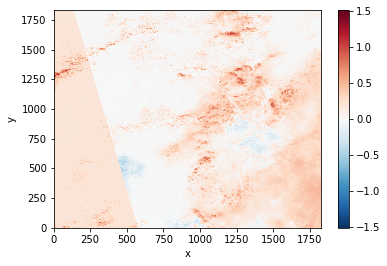

In [21]:
(ds_resa['B1'] - ds_crcc['rtoa_B1']).plot()

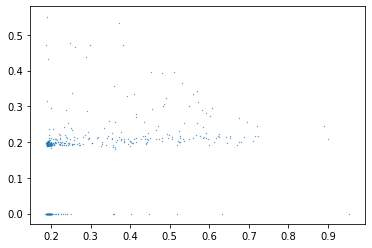

In [24]:
plt.scatter(ds_resa['B1'].isel(x=slice(0, None, 100), y=slice(0, None, 100)).values.ravel(),
            ds_crcc['rtoa_B1'].isel(x=slice(0, None, 100), y=slice(0, None, 100)).values.ravel(), s=0.1)

In [35]:
def collect_bands(arr, variable):
    return xr.concat([arr[b][variable].assign_coords(band=b).expand_dims('band') for b in range(3)],
                     dim='band')

ds_crcc['pixel_classif_flags']

# np.clip(norm(ch1, 0, 1), 0, 1).drop('quantile').plot.imshow(rgb='band', ax=axs[1])

ds = xr.concat([ds_crcc[f'rtoa_B{b}'].assign_coords(band=b).expand_dims('band') for b in [4, 3, 2]],
                     dim='band')

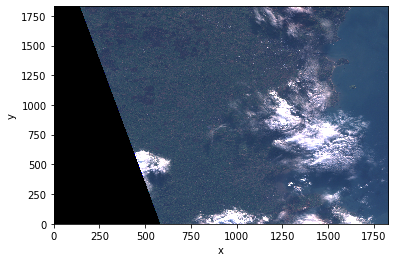

In [44]:
ds.plot.imshow(rgb='band', robust=True)

In [53]:
def get_raised_flags(value):

    flag_list = ['INVALID', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_SURE', 'CLOUD_BUFFER', 'CLOUD_SHADOW', 'SNOW_ICE',
             'BRIGHT', 'WHITE', 'COASTLINE', 'LAND', 'CIRRUS_SURE', 'CIRRUS_AMBIGUOUS', 'CLEAR_LAND', 'CLEAR_WATER',
             'WATER', 'BRIGHTWHITE', 'VEG_RISK', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

    bit_list = '{0:032b}'.format(value)
    raised_flags = []

    for index, bit in enumerate(bit_list[::-1]):
        if bit == '1':
            raised_flags.append(flag_list[index])
    return raised_flags

get_raised_flags(ds_crcc.c2rcc_flags.values)

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
res = ((data >> pos) % 2).astype(np.bool)

